In [2]:
import pandas as pd
read_News_csv = pd.read_csv('../data/raw_analyst_ratings.csv')
raw_analyst_dataFrame = pd.DataFrame(read_News_csv)

read_Finance_csv = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_dataFrame = pd.DataFrame(read_Finance_csv)
print(raw_analyst_dataFrame.head())
print(finance_dataFrame.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [8]:
raw_analyst_dataFrame['date'] = pd.to_datetime(raw_analyst_dataFrame['date'], errors='coerce')
finance_dataFrame['Date'] = pd.to_datetime(finance_dataFrame['Date'])

In [9]:
print(raw_analyst_dataFrame.head())
print(finance_dataFrame.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A  
2 2020-05-26 04:30:07-04:00     

In [10]:
raw_analyst_dataFrame['date'] = raw_analyst_dataFrame['date'].dt.normalize()
finance_dataFrame['Date'] = finance_dataFrame['Date'].dt.normalize()

In [ ]:
# merged_data = pd.merge(raw_analyst_dataFrame, finance_dataFrame, on = 'Date', how, = 'inner')
finance_dataFrame.rename(columns = {'Date':'date'}, inplace = True)
raw_analyst_dataFrame['date'] = raw_analyst_dataFrame['date'].dt.tz_convert('America/New_York')
finance_dataFrame['date'] = finance_dataFrame['date'].dt.tz_convert('America/New_York')
merged_data = pd.merge(raw_analyst_dataFrame, finance_dataFrame, on='date', how='inner')
# merged_data = merged_data[['date', 'Open', 'Close', 'High', 'Low', 'Volume']]

In [72]:
merged_data.dropna(inplace = True)
print(merged_data.head())

Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date, stock, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits]
Index: []


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3   neutral  
4  positive  


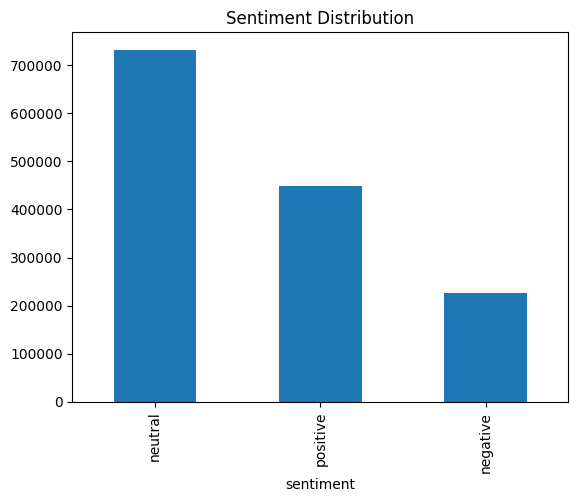

          date_x        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...          ...         ...         ...         ...         ...         ...   
10993 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996 2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997 2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends  Stock Spli

In [1]:
# Perform sentiment analysis on headlines
import pandas as pd

read_Finance_csv = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_dataFrame = pd.DataFrame(read_Finance_csv)

read_News_csv = pd.read_csv('../data/raw_analyst_ratings.csv')
raw_analyst_dataFrame = pd.DataFrame(read_News_csv)



import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


sid = SentimentIntensityAnalyzer()
raw_analyst_dataFrame['sentiment_score'] = raw_analyst_dataFrame['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])
raw_analyst_dataFrame['sentiment'] = raw_analyst_dataFrame['sentiment_score'].apply(
    lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'

)
# Display the first few rows to check the sentiment analysis results
print(raw_analyst_dataFrame[['headline', 'sentiment_score', 'sentiment']].head())

# Plot the distribution of sentiments
raw_analyst_dataFrame['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()



finance_dataFrame.rename(columns = {'Date':'date'}, inplace = True)


# Convert the Date column to datetime
finance_dataFrame['date'] = pd.to_datetime(finance_dataFrame['date'], errors='coerce')
# finance_dataFrame.set_index('date', inplace=True)

# Calculate Daily Returns
finance_dataFrame['Daily_Return'] = finance_dataFrame['Adj Close'].pct_change()

# Convert the Date column to datetime
raw_analyst_dataFrame['date'] = pd.to_datetime(raw_analyst_dataFrame['date'], errors='coerce')
# raw_analyst_dataFrame.set_index('date', inplace=True)

# Merge the two DataFrames on 'Date'
combined_data = pd.merge(finance_dataFrame, raw_analyst_dataFrame, left_index=True, right_index=True, how='left')

# Display the combined DataFrame
print(combined_data)

# Calculate correlation between Daily_Return and Sentiment_Score
correlation = combined_data[['Daily_Return', 'sentiment_score']].corr().iloc[0, 1]
print(f'Correlation between Daily Returns and Sentiment Scores: {correlation:.2f}')

